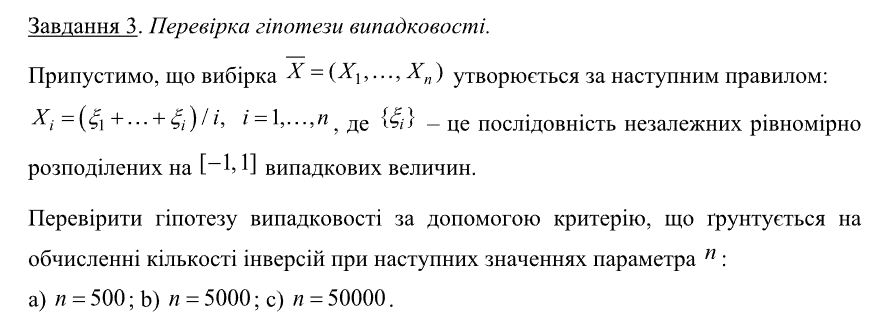

In [ ]:
import numpy as np
from scipy.stats import norm

def generate_sample(n):
    """Генерує вибірку X згідно з заданим правилом."""
    xi = np.random.uniform(-1, 1, size=(n, n))
    cumulative_sums = np.cumsum(xi, axis=1)
    return cumulative_sums.mean(axis=1)

def count_inversions(arr):
    """Підраховує кількість інверсій у масиві."""
    count = 0
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if arr[i] > arr[j]:
                count += 1
    return count

def test_randomness(n, gamma=0.05):
    """Перевіряє гіпотезу випадковості для вибірки розміру n."""
    sample = generate_sample(n)
    k = count_inversions(sample)

    # Знаходимо z_gamma
    z_gamma = norm.ppf(1 - gamma / 2)

    # Обчислюємо статистику критерію
    statistic = 6 / (n * np.sqrt(n)) *abs( k - (n * (n - 1)) / 4)

    print(f"n = {n}, gamma = {gamma}:")
    print(f"  Кількість інверсій: {k}")
    print(f"  z_gamma: {z_gamma}")
    print(f"  Статистика критерію: {statistic}")

    # Перевірка гіпотези
    if statistic > z_gamma:
        print("  Нульова гіпотеза відхиляється: вибірка не є випадковою.")
    else:
        print("  Нульова гіпотеза приймається: вибірка є випадковою.")

# Перевірка для різних значень n
test_randomness(500)
test_randomness(5000)
test_randomness(50000)

n = 500, gamma = 0.05:
  Кількість інверсій: 65228
  z_gamma: 1.959963984540054
  Статистика критерію: 1.531080465553656
  Нульова гіпотеза приймається: вибірка є випадковою.
n = 5000, gamma = 0.05:
  Кількість інверсій: 6333688
  z_gamma: 1.959963984540054
  Статистика критерію: 1.4414456587301512
  Нульова гіпотеза приймається: вибірка є випадковою.
